In [7]:
#导入需要使用的模块
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.parser import parse

#导入文件的路径是自己存放文件的位置
data = pd.read_csv('./data/data.csv',encoding= 'gbk')

In [13]:
def plot_time(time):
    data['成交时间'] = [parse(x) for x in data[time]]
    data['小时'] = [x.strftime('%H') for x in data['成交时间']] #提取成交时间的小时数
    traffic = data[['小时','orderid']].drop_duplicates() #对小时和订单去重
    x = traffic.groupby('小时')['orderid'].count() #求每小时的客流量
    y = x.reset_index() #重置索引，为绘制折线图做准备
    plt.subplot(1,1,1)
    plt.plot(y['小时'],y['orderid']) #绘制折线图
    plt.rcParams['font.sans-serif'] = 'SimHei'  # 设置中文

    plt.xlabel('时间点')
    plt.ylabel('订单量') #设置x，y轴标签

    for a,b in zip(y['小时'],y['orderid']): #设置图上显示数据标签
        plt.text(a,b,b,va='center')
    plt.title('订单量统计图') #设置图标题
    plt.show()

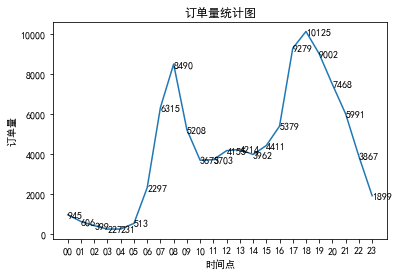

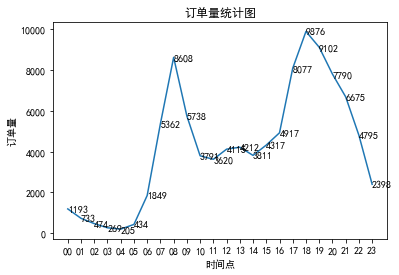

In [17]:
plot_time('start_time')#开始时间
plot_time('end_time')#结束时间

In [9]:
data['成交时间'] = [parse(x) for x in data['start_time']]
data['日期'] = [x.strftime('%d') for x in data['成交时间']] #提取成交时间的小时数